In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy.signal import fftconvolve


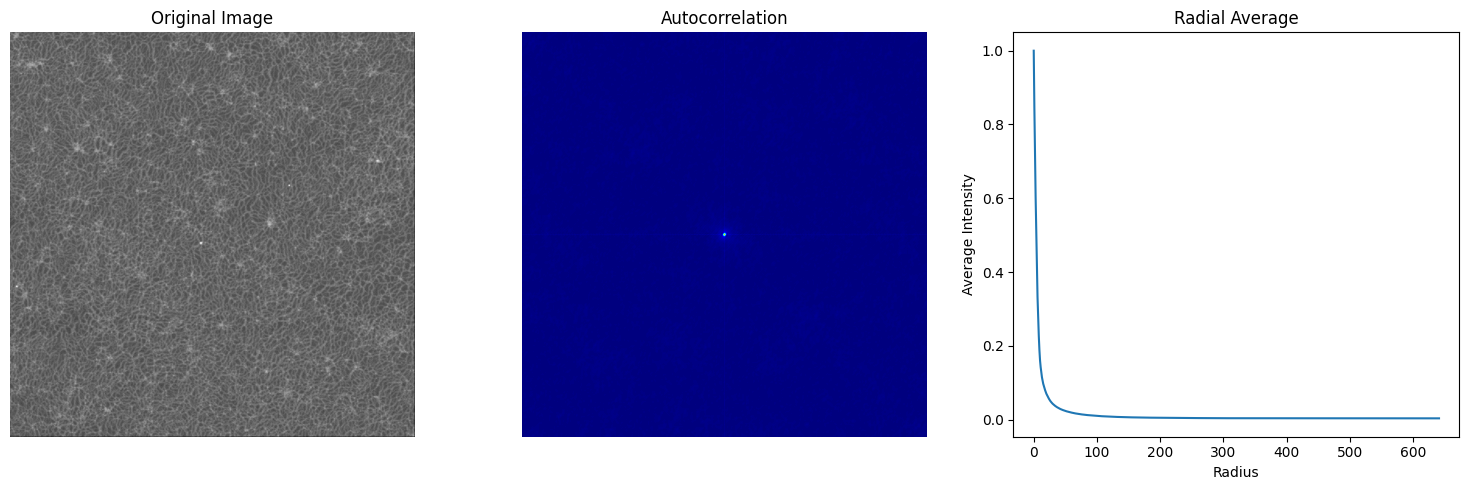

In [4]:
# Load the image
image = imread('./PristineZoom/Mid/20230417_KPN0018_Metal.0_00002.png')

# Convert the image to grayscale if necessary
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Subtract the mean from the image
image_mean = np.mean(image)
image = image - image_mean

# Compute the 2D autocorrelation using the Wiener-Khintchine theorem
autocorr = np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(image) * np.conj(np.fft.fft2(image))))) / (image.shape[0] * image.shape[1])

# Normalize the autocorrelation
autocorr /= np.max(autocorr)

# Compute the radial average
radius = np.arange(0, min(image.shape)//2, 1)
radial_average = []
for r in radius:
    mask = np.zeros_like(autocorr)
    y, x = np.indices(autocorr.shape)
    mask[((x - autocorr.shape[1]//2)**2 + (y - autocorr.shape[0]//2)**2) <= r**2] = 1
    avg = np.mean(autocorr[mask == 1])
    radial_average.append(avg)

# Plot the original image, its autocorrelation, and the radial average
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(autocorr, cmap='jet')
axes[1].set_title('Autocorrelation')
axes[1].axis('off')

axes[2].plot(radius, radial_average)
axes[2].set_title('Radial Average')
axes[2].set_xlabel('Radius')
axes[2].set_ylabel('Average Intensity')

plt.tight_layout()
plt.show()
